# Initializing the dataset and imports

In [ ]:
pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 681 kB/s 


In [ ]:
#Imports for the project
import tensorflow as tf
import keras
import numpy as np
print("TensorFlow version:", tf.__version__)
#For the newral network
from keras.layers import Input, Dense, Activation, Dropout, Flatten, InputLayer

from keras.models import Model, Sequential
from keras.regularizers import l2

from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from fast_ml.model_development import train_valid_test_split



TensorFlow version: 2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Creating the dataframe from the .csv file and printing an overview of it
data = pd.read_csv("/content/drive/MyDrive/Machine_learning/who_suicide_statistics.csv")
data_ = pd.DataFrame(data)
print(data_.head)

<bound method NDFrame.head of         country  year     sex          age  suicides_no  population
0       Albania  1985  female  15-24 years          NaN    277900.0
1       Albania  1985  female  25-34 years          NaN    246800.0
2       Albania  1985  female  35-54 years          NaN    267500.0
3       Albania  1985  female   5-14 years          NaN    298300.0
4       Albania  1985  female  55-74 years          NaN    138700.0
...         ...   ...     ...          ...          ...         ...
43771  Zimbabwe  1990    male  25-34 years        150.0         NaN
43772  Zimbabwe  1990    male  35-54 years        132.0         NaN
43773  Zimbabwe  1990    male   5-14 years          6.0         NaN
43774  Zimbabwe  1990    male  55-74 years         74.0         NaN
43775  Zimbabwe  1990    male    75+ years         13.0         NaN

[43776 rows x 6 columns]>


# Preprocessing the data

In [ ]:
# removing NaN values from the dataframe
data_ = data_.dropna()

In [ ]:
data_.country.value_counts()

Netherlands       456
Hungary           456
Belgium           444
Singapore         444
United Kingdom    444
                 ... 
Bermuda            24
Mongolia           12
Cayman Islands     12
Cabo Verde         12
Macau              12
Name: country, Length: 118, dtype: int64

In [ ]:
data2_ = data_.copy()

In [ ]:
# Extracting countries Norway, Sweden, Denmark and United States of America rows to a new dataframe
array = ['Norway', 'Sweden', 'Denmark', 'United States of America' ] 
data2_ = data_.loc[data_['country'].isin(array)]

In [ ]:
# Reindex the values
for x in range(len(data2_)):
  data2_.index.values[x] = x

In [ ]:
data2_.age.value_counts()

15-24 years    238
25-34 years    238
35-54 years    238
5-14 years     238
55-74 years    238
75+ years      238
Name: age, dtype: int64

In [ ]:
data2_["decade"] = data2_["year"]//10*10
data2_ = data2_.drop('year', axis = 1)

In [ ]:
data2_

,country,sex,age,suicides_no,population,decade
0,Denmark,female,15-24 years,13.0,346100.0,1990
1,Denmark,female,25-34 years,23.0,392600.0,1990
2,Denmark,female,35-54 years,113.0,732100.0,1990
3,Denmark,female,5-14 years,0.0,274900.0,1990
4,Denmark,female,55-74 years,100.0,500000.0,1990
...,...,...,...,...,...,...
1423,United States of America,male,25-34 years,5503.0,22137097.0,2010
1424,United States of America,male,35-54 years,11634.0,41658010.0,2010
1425,United States of America,male,5-14 years,255.0,21273987.0,2010
1426,United States of America,male,55-74 years,9068.0,32264697.0,2010


In [ ]:
data2_.country.value_counts()

United States of America    444
Norway                      360
Sweden                      360
Denmark                     264
Name: country, dtype: int64

# One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data2_['decade'] = data2_['decade'].astype(object)
data2_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1428 non-null   object 
 1   sex          1428 non-null   object 
 2   age          1428 non-null   object 
 3   suicides_no  1428 non-null   float64
 4   population   1428 non-null   float64
 5   decade       1428 non-null   object 
dtypes: float64(2), object(4)
memory usage: 78.1+ KB


In [ ]:
object_colums = list(data2_.select_dtypes(include=['object']).columns)

In [ ]:
data2_encoded = pd.get_dummies(data=data2_, columns=object_colums)

In [ ]:
data2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   suicides_no                       1428 non-null   float64
 1   population                        1428 non-null   float64
 2   country_Denmark                   1428 non-null   uint8  
 3   country_Norway                    1428 non-null   uint8  
 4   country_Sweden                    1428 non-null   uint8  
 5   country_United States of America  1428 non-null   uint8  
 6   sex_female                        1428 non-null   uint8  
 7   sex_male                          1428 non-null   uint8  
 8   age_15-24 years                   1428 non-null   uint8  
 9   age_25-34 years                   1428 non-null   uint8  
 10  age_35-54 years                   1428 non-null   uint8  
 11  age_5-14 years                    1428 non-null   uint8  
 12  age_55

In [ ]:
data2_encoded.head()

,suicides_no,population,country_Denmark,country_Norway,country_Sweden,country_United States of America,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,13.0,346100.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,23.0,392600.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,113.0,732100.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,0.0,274900.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,100.0,500000.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


# Splitting dataset

In [ ]:
#the code to splitting the data sets int to tran tes whit 60% train and 20% validate and 20%test
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data2_encoded, target = "suicides_no", 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(999, 18)
(999,)
(214, 18)
(214,)
(215, 18)
(215,)


(None, None)

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = MinMaxScaler()
scale_columns = ['population']
X_train[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
#Take the shape out of X_train automaticly
n_inputs = X_train.shape[ 1 ]

In [ ]:
# Algorithm to find the recommended neurons for the hidden layers
Sample_size = int(len(data2_encoded.value_counts()))
Input = len(data2_encoded.columns.values)-1
Output = len(data2_encoded.columns.values) - (len(data2_encoded.columns.values)-1)

Neurons =  Sample_size / int(2 * (Input * Output ))

print(Neurons)

39.638888888888886


# Model creation

In [ ]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

acc_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                                patience= 500, 
                                                mode = 'min', 
                                                verbose = 1,
                                                min_delta = 100,
                                                restore_best_weights = True
                                                )

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

#https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594

In [ ]:
# Creation of the sequential model
def model (activation = 'relu', loss = 'mse', den1 = 500, den2 = 200, learning_rate = 0.01):

  L2 = tf.keras.regularizers.L2(l2=0.001)


  model_1 = Sequential()
  model_1.add(InputLayer(input_shape=(n_inputs,)))
  model_1.add(Dense(den1, activation = activation, use_bias = True, kernel_regularizer='l2'))
  model_1.add(Dense(den2, activation = activation, use_bias = True, kernel_regularizer='l2'))
  model_1.add(Dense(1, activation = activation ,use_bias = True))

  model_1.compile(
    optimizer= keras.optimizers.RMSprop(
        learning_rate = learning_rate
    ),
    loss = loss,
    metrics=['accuracy']
    )


  return model_1

In [ ]:
history = model().fit(
    X_train, 
    y_train, 
    batch_size = 32, 
    epochs= 2000,
    callbacks = [acc_callback] ,
    validation_data = (X_valid, y_valid),
    validation_batch_size = 16,
    verbose = 1,
    ) 

 #callbacks = callbacks_list , callbacks = [acc_callback]
# https://stackoverflow.com/questions/47266383/save-and-load-weights-in-keras
# https://keras.io/api/callbacks/learning_rate_scheduler/


Epoch 1/2000
32/32 [==============================] - 1s 11ms/step - loss: 1981230.8750 - accuracy: 0.0370 - val_loss: 648913537208653185024.0000 - val_accuracy: 0.0234
Epoch 2/2000
32/32 [==============================] - 0s 8ms/step - loss: 330651.3438 - accuracy: 0.0310 - val_loss: 1699308203761108779008.0000 - val_accuracy: 0.0234
Epoch 3/2000
32/32 [==============================] - 0s 7ms/step - loss: 146410.5781 - accuracy: 0.0310 - val_loss: 2365323738342236356608.0000 - val_accuracy: 0.0234
Epoch 4/2000
32/32 [==============================] - 0s 6ms/step - loss: 125172.8672 - accuracy: 0.0310 - val_loss: 3124055582139482112000.0000 - val_accuracy: 0.0234
Epoch 5/2000
32/32 [==============================] - 0s 7ms/step - loss: 114952.9375 - accuracy: 0.0300 - val_loss: 3584657293379125641216.0000 - val_accuracy: 0.0234
Epoch 6/2000
32/32 [==============================] - 0s 6ms/step - loss: 87357.0234 - accuracy: 0.0290 - val_loss: 3627259657004190269440.0000 - val_accuracy:

In [ ]:
ev = model().evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 4623974.0000 - accuracy: 0.0186


# Test data on other models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.9943841033147912

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.6947029853073987

In [ ]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(random_state=1, max_iter=300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.3156123795892113

# Plotting results

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


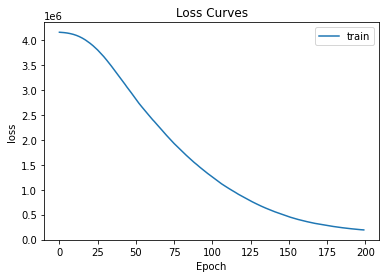

In [ ]:
#plotting the loss
pyplot.title( 'Loss Curves' )
pyplot.xlabel( 'Epoch' )
pyplot.ylabel( 'loss' )
pyplot.plot( history.history['loss'], label = 'train' )
pyplot.legend()
#pyplot.savefig("/content/drive/MyDrive/Machine_learning/50000_epochs_32_batch_500_200_hidden_sigmoid_SGD_lr_0_01_MinMaxed_scaled_data.PNG", bbox_inches='tight', dpi=150)
pyplot.show()

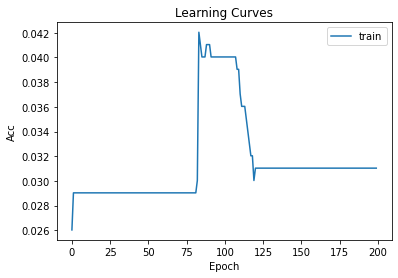

In [ ]:
#plotting the loss
pyplot.title( 'Learning Curves' )
pyplot.xlabel( 'Epoch' )
pyplot.ylabel( 'Acc' )
pyplot.plot( history.history['accuracy'], label = 'train' )
pyplot.legend()
#pyplot.savefig("/content/drive/MyDrive/Machine_learning/50000_epochs_32_batch_500_200_hidden_sigmoid_SGD_lr_0_01_MinMaxed_scaled_data.PNG", bbox_inches='tight', dpi=150)
pyplot.show()

In [ ]:
model_predict = model().predict(X_test) #Predictions on Testing data
print("Prediction shape is " + str(model_predict.shape) + " and x_test shape is " + str(X_test.shape))

7/7 [==============================] - 0s 3ms/step
Prediction shape is (215, 1) and x_test shape is (215, 18)


In [ ]:
print("Prediction shape is " + str(model_predict.shape) + " and y_test shape is " + str(y_test.shape))

Prediction shape is (215, 1) and y_test shape is (215,)


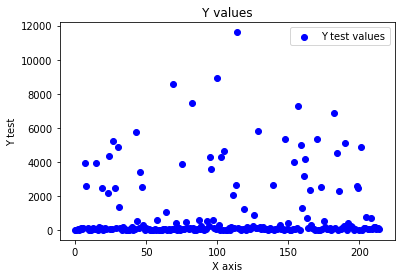

In [ ]:
import matplotlib.pyplot as plt
plt.title("Y values")
plt.xlabel("X axis")
plt.ylabel("Y test")
xx = np.arange(len(y_test))
plt.scatter(xx, y_test, color = "blue", marker = "o", label = "Y test values")
plt.legend()
plt.show()

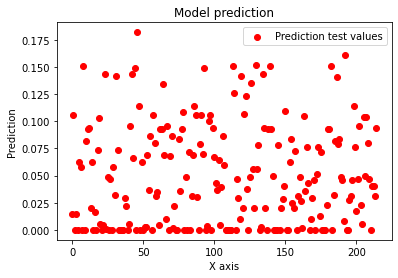

In [ ]:
plt.title("Model prediction")
plt.xlabel("X axis")
plt.ylabel("Prediction")
plt.scatter(xx, model_predict, color = "red", marker = "o", label = "Prediction test values")
plt.legend()
plt.show()

In [ ]:
r2_score(y_test, model_predict)

-0.24761260575753674

# Grid Param Search

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


model_CV = KerasClassifier(build_fn = model, epochs = 2000, batch_size = 32, verbose=1)
# define the grid search parameters

#mr = ['sgd','adam','rmsprop']
actt = ['relu','elu','sigmoid']
dens = [10, 20, 30, 40, 50, 60, 100, 200, 500]
dens1 = [10, 20, 30, 40, 50, 60, 100, 200, 500]
lr = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
lss = ['mse','mae']
param_grid = dict(loss = lss, activation = actt, den1 = dens, den2 = dens1, learning_rate = lr)

grid = GridSearchCV(estimator = model_CV, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')